# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [1]:
import pandas as pd
import numpy as np
import random

random.seed(2022)
# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
95,11150,14950,1341
12,182110,119250,655
17,187820,134950,719
104,11159,16207,1452
44,8820,4890,554


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
95,0.058552,0.006292,0.033344
12,0.956314,0.050187,0.016287
17,0.986299,0.056795,0.017878
104,0.058599,0.006821,0.036104
44,0.046316,0.002058,0.013775


## Loading SOM utils

In [6]:
from soms.som_utils import neighborhood_preservation_trustworthiness
from soms.som_utils import som_train_predict
from soms.som_utils import visualize_som

## Base SOM (SOM1)

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 16
neighborhood ra

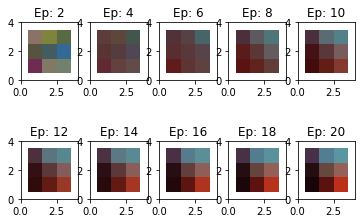

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
95,1995/96,2052/53,JUTE,11150,14950,1341,0.058552,0.006292,0.033344,"[[0.08863398966325299, 0.01786296177838723, 0....","[0, 0]"
12,1996/97,2053/54,OILSEED,182110,119250,655,0.956314,0.050187,0.016287,"[[0.7424766583653156, 0.1864803222658852, 0.10...","[2, 0]"
17,2001/2002,2058/59,OILSEED,187820,134950,719,0.986299,0.056795,0.017878,"[[0.7424766583653156, 0.1864803222658852, 0.10...","[2, 0]"
104,2004/2005,2061/62,JUTE,11159,16207,1452,0.058599,0.006821,0.036104,"[[0.08863398966325299, 0.01786296177838723, 0....","[0, 0]"
44,1986/87,2043/44,TOBACCO,8820,4890,554,0.046316,0.002058,0.013775,"[[0.08863398966325299, 0.01786296177838723, 0....","[0, 0]"


In [7]:
from soms.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
joined_df.iloc[0:5]

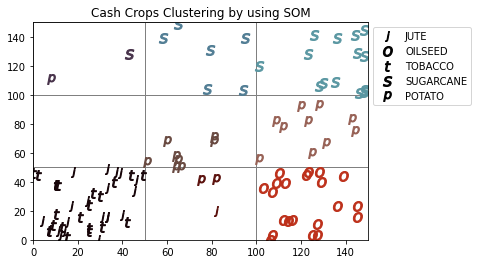

In [8]:
visualize_som(som_1, joined_df)

In [9]:
trunc_data.head()

,Area,Production,Yield
95,0.058552,0.006292,0.033344
12,0.956314,0.050187,0.016287
17,0.986299,0.056795,0.017878
104,0.058599,0.006821,0.036104
44,0.046316,0.002058,0.013775


In [10]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
95,0.088634,0.017863,0.034461
12,0.742477,0.186480,0.101316
17,0.742477,0.186480,0.101316
104,0.088634,0.017863,0.034461
44,0.088634,0.017863,0.034461


<br /> <br />

## **Q1:** Which numerical criteria would you use to measure an enhancement of the algorithm?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in function `neighborhood_preservation_trustworthiness` inside `soms/som_utils.py` file.

In [11]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9871474803513638, 0.8788678840551241)

<br /> <br />

## **Q2:** Write a SOM1A version, where you alter the interpolation curve of the learning factor. Can you get improvements?

**TODO : ANSWER HERE**


**Notes**
- Changed the decay func to  `initial_learning_rate * math.pow(2, (-iteration / num_iterations))`
- Graph is similar to the `initial_learning_rate * np.exp(-iteration / num_iterations)` (It was on base)
- Check graph here [desmos graph](https://www.desmos.com/calculator/cpaljvrhav)

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.009330329915368075
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.008705505632961241
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.008122523963562356
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.00757858283255199
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.007071067811865476
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.006597539553864471
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.006155722066724581
-------------------------------------
SOM training epoches 16
neighborhood rad

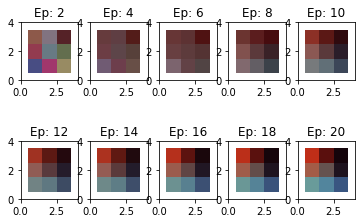

In [12]:
from soms.our_som1_A import SOM as SOM_1_A
# som = SOM(x_size, y_size, num_features)
som_1_A = SOM_1_A(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
#joined_df.iloc[0:5]

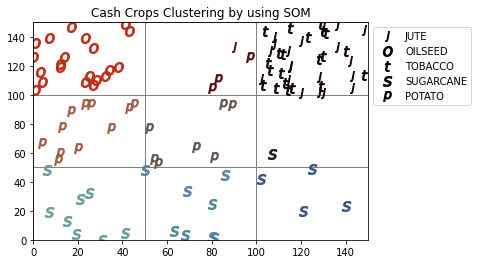

In [13]:
visualize_som(som_1_A, joined_df)

In [14]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

In [15]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.7866851595006935, 0.8877152275386435)

**DISCUSSION HERE**

<br /> <br />